<a href="https://colab.research.google.com/github/aliobeid/training/blob/master/SinglelayerPerceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, matthews_corrcoef
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
plt.rcParams['figure.figsize'] = [15, 10]

In [ ]:
X, y =make_moons(n_samples=200,noise=0.1, random_state=0)
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'random_state': 5, 'alpha': 0.010499999999999999}
1.0


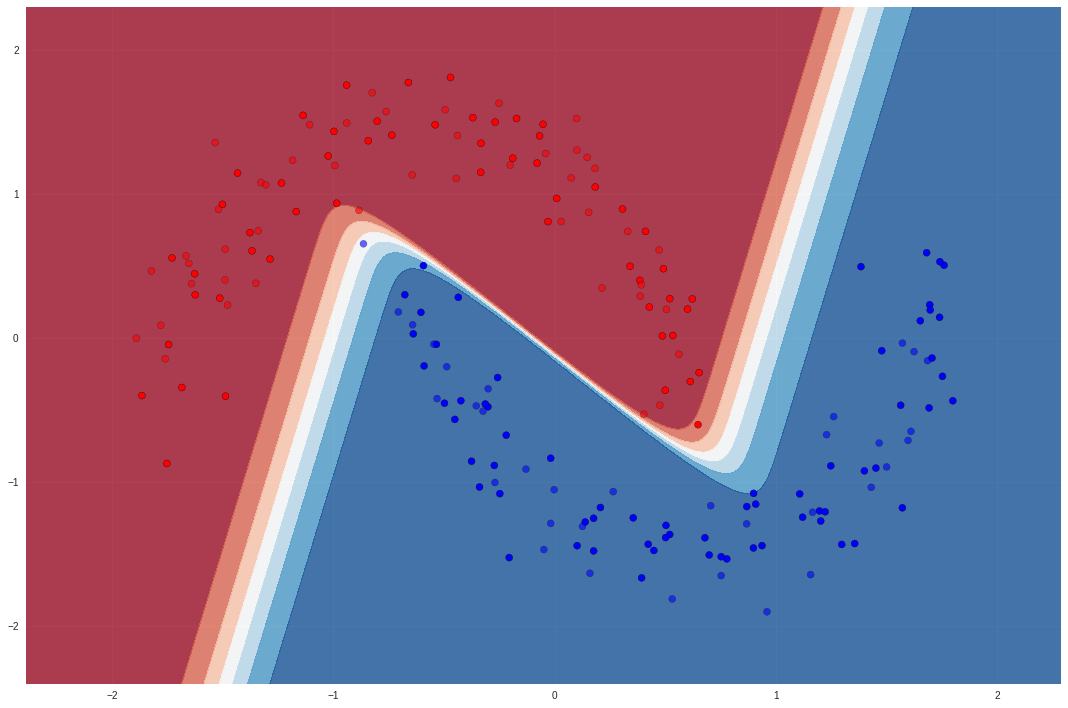

In [ ]:
h = .02  # step size in the mesh
a = 'tanh'
s = 'lbfgs'
max_iter = 100000000
#alpha = 0.2

clf=MLPClassifier(hidden_layer_sizes=(2,), max_iter=max_iter, solver=s,activation=a,verbose=True)
param={'random_state': range(10),
       'alpha': np.arange(0.0005,0.5,0.005)}

nn= RandomizedSearchCV(clf, param, n_iter=10, n_jobs=-1, cv=3)
nn.fit(X, y)

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = nn.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

 # Put the result into a color plot
Z = Z.reshape(xx.shape)
ax=plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)

# Plot the training points
ax=plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
ax=plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

print(nn.best_params_ )
print(nn.score(X_test, y_test))
plt.tight_layout()
plt.show()

In [ ]:
print(nn.best_estimator_.coefs_,nn.best_estimator_.intercepts_)


[array([[ 0.65407264,  7.24755596],
       [-0.12991577,  4.79343809]]), array([[ 22.07280006],
       [-12.38161896]])] [array([0.02380203, 0.67810854]), array([0.11197189])]


In [ ]:
import pandas
pandas.DataFrame(nn.cv_results_)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,param_random_state,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.069414,0.000665,0.880,0.897520,0.0405,1,"{'random_state': 1, 'alpha': 0.040499999999999...",7,0.897059,0.901515,0.848485,0.910448,0.893939,0.880597,0.022052,0.000036,0.022154,0.012510
1,0.068399,0.000891,0.895,0.914933,0.4755,2,"{'random_state': 2, 'alpha': 0.4754999999999999}",5,0.882353,0.901515,0.833333,0.895522,0.969697,0.947761,0.047936,0.000441,0.056130,0.023342
2,0.058962,0.000728,0.910,0.922886,0.0205,3,"{'random_state': 3, 'alpha': 0.020499999999999...",3,1.000000,1.000000,0.833333,0.888060,0.893939,0.880597,0.023437,0.000099,0.069129,0.054613
3,0.072254,0.000668,0.975,1.000000,0.0105,5,"{'random_state': 5, 'alpha': 0.010499999999999...",1,1.000000,1.000000,0.939394,1.000000,0.984848,1.000000,0.014732,0.000019,0.025746,0.000000
4,0.036918,0.004411,0.880,0.890057,0.4055,7,"{'random_state': 7, 'alpha': 0.4054999999999999}",7,0.882353,0.901515,0.833333,0.895522,0.924242,0.873134,0.015462,0.005277,0.036966,0.012214
5,0.053797,0.000743,0.890,0.892432,0.3655,4,"{'random_state': 4, 'alpha': 0.36549999999999994}",6,0.911765,0.878788,0.848485,0.917910,0.909091,0.880597,0.018692,0.000065,0.029156,0.018031
6,0.042691,0.000691,0.900,0.919908,0.2305,2,"{'random_state': 2, 'alpha': 0.23049999999999995}",4,0.882353,0.901515,0.833333,0.888060,0.984848,0.970149,0.008494,0.000015,0.062836,0.035948
7,0.045774,0.000699,0.915,0.929858,0.0355,2,"{'random_state': 2, 'alpha': 0.0355}",2,0.897059,0.901515,0.848485,0.895522,1.000000,0.992537,0.017922,0.000180,0.062878,0.044388
8,0.024008,0.000665,0.880,0.887570,0.1705,8,"{'random_state': 8, 'alpha': 0.17049999999999998}",7,0.882353,0.901515,0.833333,0.888060,0.924242,0.873134,0.011033,0.000234,0.036966,0.011592
9,0.016526,0.000572,0.880,0.890057,0.3405,7,"{'random_state': 7, 'alpha': 0.34049999999999997}",7,0.882353,0.901515,0.833333,0.895522,0.924242,0.873134,0.002671,0.000048,0.036966,0.012214


[array([[-0.66491063, -5.99816399],
       [ 0.13907145, -3.82369965]]), array([[-16.53339218],
       [  9.14208312]])]
[array([0.04063317, 0.01169239]), array([0.40667715])]
0.975


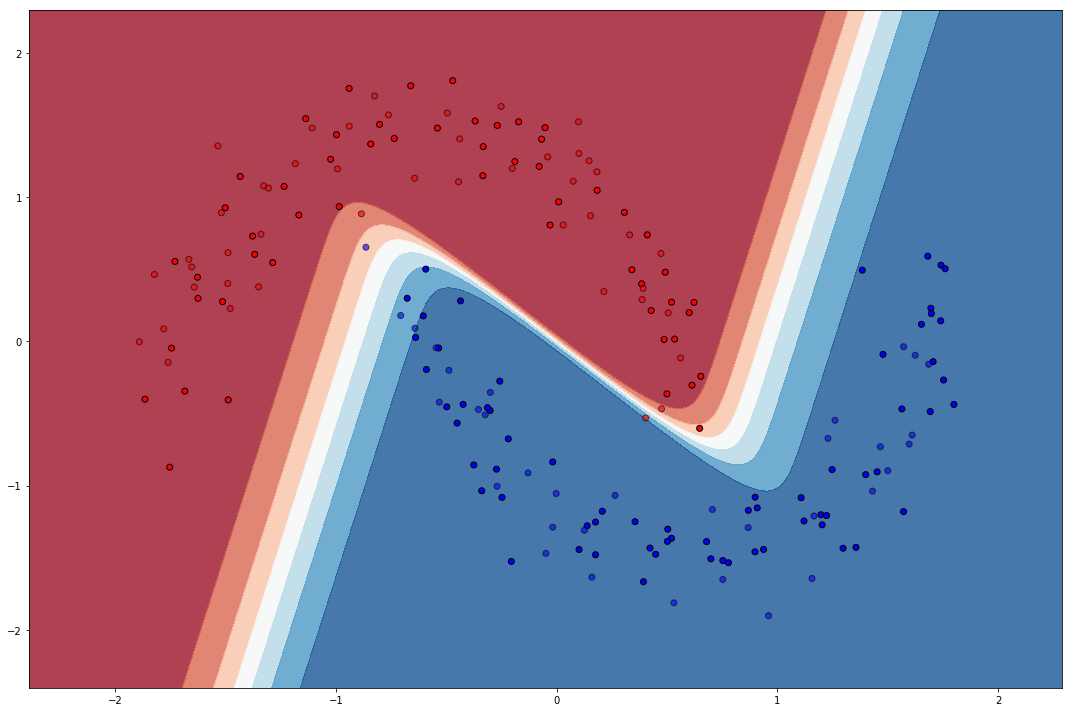

In [ ]:
h = .02  # step size in the mesh

a='tanh'
s='lbfgs'
max_iter=100000000
alpha=0.02

nn=MLPClassifier(hidden_layer_sizes=(2,),alpha=alpha, max_iter=max_iter, solver=s,activation=a,verbose=False,warm_start=True).fit(X_train, y_train)
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = nn.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

 # Put the result into a color plot
Z = Z.reshape(xx.shape)
ax=plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)

# Plot the training points
ax=plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
ax=plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

print(nn.coefs_)
print(nn.intercepts_)
print(nn.score(X_test, y_test))
plt.tight_layout()
plt.show()


Weights: [array([[ 0.67599444, -7.46181953],
       [-0.12199099, -5.15593503]]), array([[22.91074703],
       [12.96043296]])]
Intercepts: [array([-0.0315498 , -0.02783086]), array([0.36168827])]
Score: 0.975


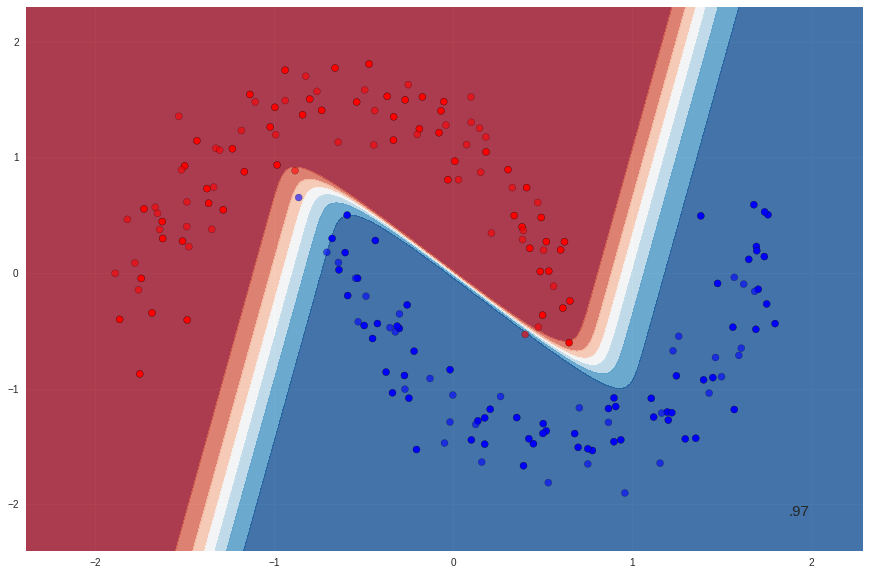

In [ ]:
h = .02  # step size in the mesh

a='tanh'
s='lbfgs'
max_iter=100000000
alpha=0.005

nn=MLPClassifier(hidden_layer_sizes=(2,),
                 alpha=alpha, 
                 max_iter=max_iter, 
                 solver=s,
                 activation=a,
                 verbose=False,
                 warm_start=True)

nn.fit(X_train, y_train)
score = nn.score(X_test, y_test)
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = nn.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

 # Put the result into a color plot
Z = Z.reshape(xx.shape)
ax=plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)

# Plot the training points
ax=plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
ax=plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)
ax=plt.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
print('Weights:',nn.coefs_)
print('Intercepts:', nn.intercepts_)
print('Score:', nn.score(X_test, y_test))

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
plt.rcParams['figure.figsize'] = [15, 10]

In [ ]:
X, y =make_moons(n_samples=200,noise=0.1, random_state=0)
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

In [ ]:
from tensorflow.keras.models import Sequential, Dense


80/80 [==============================] - 0s 42us/step
[array([[-0.25835645, -0.22732258],
       [ 0.54222554,  0.57596755]], dtype=float32), array([ 0.10844073, -0.15929385], dtype=float32), array([[-3.596408 ],
       [-1.6717901]], dtype=float32), array([0.10374356], dtype=float32)]


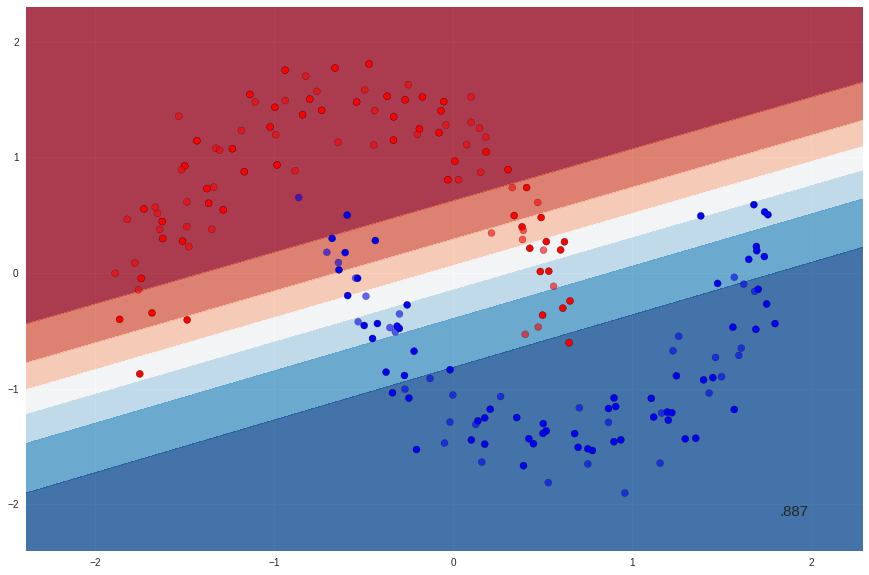

In [ ]:
# create neural net with one hidden layer and two neurons

model = Sequential()
model.add(Dense(2, input_dim=2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy'])
# Fit the model
model.fit(X_train, y_train, epochs=3000, batch_size=100, validation_data=(X_test, y_test), verbose=0)
# evaluate the model
score = model.evaluate(X_test, y_test)[1]
h = .02  # step size in the mesh
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

 # Put the result into a color plot
Z = Z.reshape(xx.shape)
ax=plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)

# Plot the training points
ax=plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
ax=plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)
ax=plt.text(xx.max() - .3, yy.min() + .3, ('%.3f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
print(model.get_weights())

plt.show()